In [450]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format


In [451]:
# First we'll set up Piques profile from last season, and look at where all he excels

spain_players=pd.read_csv('SP2021_Outfield.csv')
spain_opp=pd.read_csv('SP2021_teams_vs.csv')

spain_def=spain_players[spain_players.position=='DF'].reset_index(drop=True)
spain_opp_check=spain_opp[['squad','minutes','touches']]

In [452]:
# Filtering to personally chosen stats to profile player

spain_def_stats=spain_def[['player', 'squad', 'age','minutes','shots_total_per90',
                                   'assisted_shots','passes_into_penalty_area','dribbles','dribbles_completed_pct',
                                   'passes_long','passes_short','passes_pressure','passes_switches','crosses',
                                   'passes','passes_pct','progressive_passes',
                                   'passes_completed','passes_progressive_distance',
                                  'passes_pct_long','progressive_carries','carry_progressive_distance','carries',
                                  'tackles','interceptions','dribbles_vs','dribble_tackles_pct',
                                   'pressures','pressure_regain_pct','aerials_won', 'aerials_lost', 'aerials_won_pct']]

In [453]:
# Adding touches data to normalise defensive stats

spain_opp_check['squad']=spain_opp_check.apply(lambda row: row['squad'][3:], axis=1)
spain_opp_check.columns=['squad','minutes_total','touches_against']

In [454]:
# Final set up table and adding minutes condition

spain_setup=spain_def_stats.merge(spain_opp_check)
spain_setup=spain_setup[spain_setup.minutes>=1450].reset_index(drop=True)

In [455]:
# Setting up normalised data points

spain_setup['key_passes_per90']=spain_setup['assisted_shots']/spain_setup['minutes']*90
spain_setup['passes_into_penalty_area_per90']=spain_setup['passes_into_penalty_area']/spain_setup['minutes']*90
spain_setup['dribbles_per90']=spain_setup['dribbles']/spain_setup['minutes']*90

spain_setup['per_passes_long']=spain_setup['passes_long']/spain_setup['passes']*100
spain_setup['per_passes_short']=spain_setup['passes_short']/spain_setup['passes']*100
spain_setup['passes_pressure_per90']=spain_setup['passes_pressure']/spain_setup['minutes']*90
spain_setup['passes_switches_per90']=spain_setup['passes_switches']/spain_setup['minutes']*90
spain_setup['crosses_per90']=spain_setup['crosses']/spain_setup['minutes']*90

spain_setup['passes_per90']=spain_setup['passes']/spain_setup['minutes']*90
spain_setup['progressive_passes_per90']=spain_setup['progressive_passes']/spain_setup['minutes']*90
spain_setup['prog_dist_perpass']=spain_setup['passes_progressive_distance']/spain_setup['passes_completed']
spain_setup['per_progressive_passes']=spain_setup['progressive_passes']/spain_setup['passes_completed']*100
spain_setup['progressive_carries_per90']=spain_setup['progressive_carries']/spain_setup['minutes']*90
spain_setup['prog_dist_percarry']=spain_setup['carry_progressive_distance']/spain_setup['carries']

spain_setup['padj_tackles']=1000*(spain_setup['tackles']/spain_setup['minutes'])/(spain_setup['touches_against']/spain_setup['minutes_total'])
spain_setup['padj_int']=1000*(spain_setup['interceptions']/spain_setup['minutes'])/(spain_setup['touches_against']/spain_setup['minutes_total'])
spain_setup['dribble_vs_per90']=spain_setup['dribbles_vs']/spain_setup['minutes']*90
spain_setup['pressures_per90']=spain_setup['pressures']/spain_setup['minutes']*90
spain_setup['aerial_duels_per90']=(spain_setup['aerials_won']+spain_setup['aerials_won'])/spain_setup['minutes']*90


In [456]:
# final table with required data points

spain_final=spain_setup[['player', 'squad', 'age','shots_total_per90','key_passes_per90',
       'passes_into_penalty_area_per90', 'dribbles_per90','dribbles_completed_pct',
                        'per_passes_long',
       'per_passes_short', 'passes_pressure_per90', 'passes_switches_per90',
       'crosses_per90','passes_per90','passes_pct',
       'passes_pct_long','progressive_passes_per90',
       'prog_dist_perpass', 'per_progressive_passes',
       'progressive_carries_per90', 'prog_dist_percarry','padj_tackles',
       'padj_int', 'dribble_vs_per90','dribble_tackles_pct','pressures_per90','pressure_regain_pct',
                        'aerial_duels_per90','aerials_won_pct']]

In [457]:
# adding percentile columns for all of the data columns

for x in spain_final[['shots_total_per90','key_passes_per90',
       'passes_into_penalty_area_per90', 'dribbles_per90','dribbles_completed_pct',
                        'per_passes_long',
       'per_passes_short', 'passes_pressure_per90', 'passes_switches_per90',
       'crosses_per90','passes_per90','passes_pct',
       'passes_pct_long','progressive_passes_per90',
       'prog_dist_perpass', 'per_progressive_passes',
       'progressive_carries_per90', 'prog_dist_percarry','padj_tackles',
       'padj_int', 'dribble_vs_per90','dribble_tackles_pct','pressures_per90','pressure_regain_pct',
                        'aerial_duels_per90','aerials_won_pct']].columns:
    spain_final[x+'_percentile']=spain_final[x].rank(pct=True)*100

In [458]:
# filtering to pique

check=spain_final[spain_final.player=='Gerard Piqué']

In [459]:
# global variables for profile graph

colors = {"background": "#111111", "text": "#009AFF", "bar": "#009AFF"}

left  = 0.125
right = 0.9
bottom = 0.1
top = 0.9   
wspace = 0.5 
hspace = 0.2

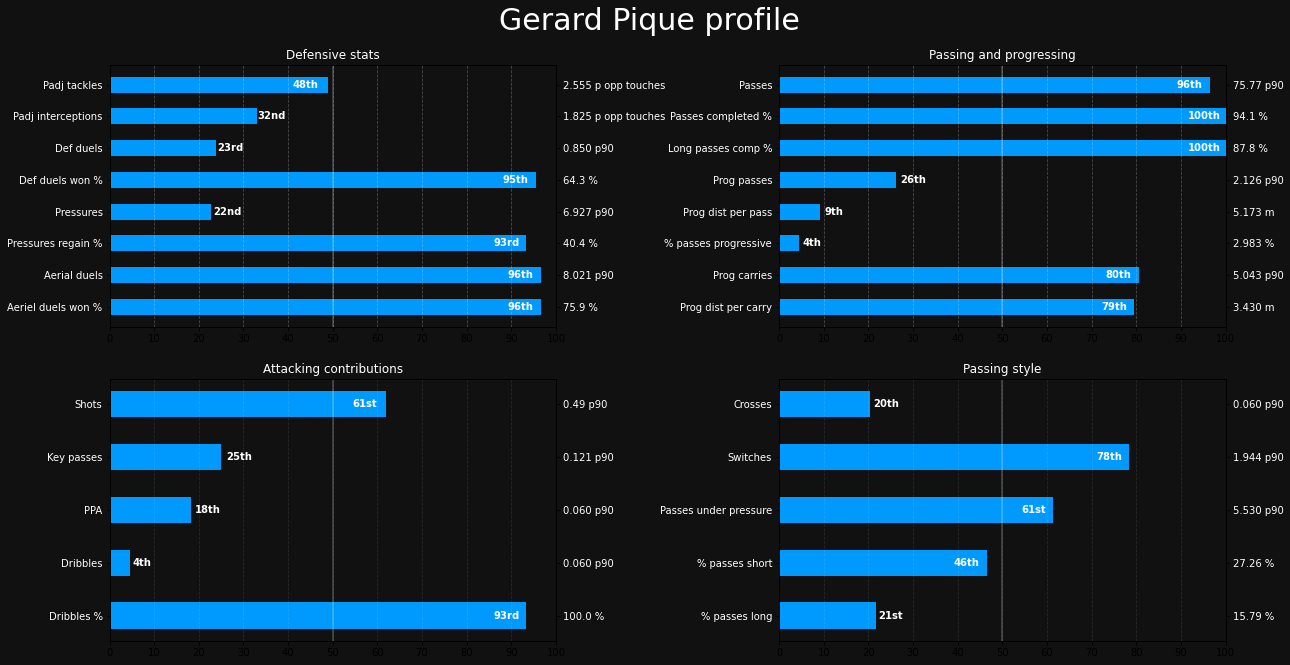

In [460]:
# setting up figure

fig, ((ax4,ax3), (ax1, ax2)) = plt.subplots(2,2,figsize=(20,10))
fig.tight_layout()
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


fig.suptitle('Gerard Pique profile', color='white', size=30)

pos = np.arange(5)
fig.patch.set_facecolor(colors['background'])

ranks = [0, 'Dribbles %', 'Dribbles','PPA', 'Key passes','Shots']
test_units = ['%', 'p90', 'p90', 'p90', 'p90']

rects = ax1.barh(pos, [check[k+'_percentile'].values[0] for k in check[['dribbles_completed_pct','dribbles_per90',
       'passes_into_penalty_area_per90','key_passes_per90','shots_total_per90']].columns],
                 align='center',
                 height=0.5,
                color=colors['bar'])

ax1.set_title('Attacking contributions', color='white')
ax1.set_facecolor(colors['background'])
ax1.set_yticklabels(ranks, color='white')

ax1.set_xlim([0, 100])
ax1.xaxis.set_major_locator(MaxNLocator(11))
ax1.xaxis.grid(True, linestyle='--', which='major',
               color='white', alpha=.1)

ax1.axvline(50, color='white', alpha=0.25)

ax12 = ax1.twinx()

ax12.set_yticks(pos)

ax12.set_ylim(ax1.get_ylim())


ax12.set_yticklabels([str(check[k].values[0])[:5]+' '+ test_units[i] for (k,i) in zip(check[['dribbles_completed_pct','dribbles_per90',
       'passes_into_penalty_area_per90','key_passes_per90','shots_total_per90']].columns,range(len(test_units)))], color='white')



rect_labels = []

for rect in rects:
    width = int(rect.get_width())

    rank_str = attach_ordinal(width)
    if width < 40:
        xloc = 5
        clr = 'white'
        align = 'left'
    else:
        xloc = -5
        clr = 'white'
        align = 'right'

    yloc = rect.get_y() + rect.get_height() / 2
    label = ax1.annotate(
        rank_str, xy=(width, yloc), xytext=(xloc, 0),
        textcoords="offset points",
        horizontalalignment=align, verticalalignment='center',
        color=clr, weight='bold', clip_on=True)
    rect_labels.append(label)
    
    
ranks_1 = [0,'% passes long', '% passes short', 'Passes under pressure', 'Switches',
              'Crosses']
test_units_1 = ['%','%', 'p90', 'p90', 'p90']

rects_1 = ax2.barh(pos, [check[k+'_percentile'].values[0] for k in check[['per_passes_long', 'per_passes_short',
       'passes_pressure_per90', 'passes_switches_per90', 'crosses_per90']].columns],
                 align='center',
                 height=0.5,
                color=colors['bar'])

ax2.set_title('Passing style', color='white')
ax2.set_facecolor(colors['background'])
ax2.set_yticklabels(ranks_1, color='white')

ax2.set_xlim([0, 100])
ax2.xaxis.set_major_locator(MaxNLocator(11))
ax2.xaxis.grid(True, linestyle='--', which='major',
               color='white', alpha=.1)

ax2.axvline(50, color='white', alpha=0.25)

ax22 = ax2.twinx()

ax22.set_yticks(pos)
ax22.set_ylim(ax1.get_ylim())

ax22.set_yticklabels([str(check[k].values[0])[:5]+' '+ test_units_1[i] for (k,i) in zip(check[['per_passes_long', 'per_passes_short',
       'passes_pressure_per90', 'passes_switches_per90', 'crosses_per90']].columns,range(len(test_units_1)))], color='white')



rect_labels_1 = []
for rect in rects_1:
    width_1 = int(rect.get_width())

    rank_str_1 = attach_ordinal(width_1)
    if width_1 < 40:
        xloc_1 = 5
        clr = 'white'
        align = 'left'
    else:
        xloc_1 = -5
        clr = 'white'
        align = 'right'

    yloc_1 = rect.get_y() + rect.get_height() / 2
    label_1 = ax2.annotate(
        rank_str_1, xy=(width_1, yloc_1), xytext=(xloc_1, 0),
        textcoords="offset points",
        horizontalalignment=align, verticalalignment='center',
        color=clr, weight='bold', clip_on=True)
    rect_labels_1.append(label)
    
pos_2 = np.arange(8)
fig.patch.set_facecolor(colors['background'])

ranks_2 = [0, 'Prog dist per carry','Prog carries','% passes progressive',
           'Prog dist per pass','Prog passes','Long passes comp %','Passes completed %','Passes']
test_units_2 = ['m','p90', '%', 'm', 'p90', '%','%','p90']

rects_2 = ax3.barh(pos_2, [check[k+'_percentile'].values[0] for k in check[[
    'prog_dist_percarry','progressive_carries_per90', 'per_progressive_passes','prog_dist_perpass','progressive_passes_per90',
    'passes_pct_long','passes_pct','passes_per90']].columns],
                 align='center',
                 height=0.5,
                color=colors['bar'])

ax3.set_title('Passing and progressing', color='white')
ax3.set_facecolor(colors['background'])
ax3.set_yticklabels(ranks_2, color='white')

ax3.set_xlim([0, 100])
ax3.xaxis.set_major_locator(MaxNLocator(11))
ax3.xaxis.grid(True, linestyle='--', which='major',
               color='white', alpha=.25)

ax3.axvline(50, color='white', alpha=0.25)

ax32 = ax3.twinx()

ax32.set_yticks(pos_2)
ax32.set_ylim(ax3.get_ylim())

ax32.set_yticklabels([str(check[k].values[0])[:5]+' '+ test_units_2[i] for (k,i) in zip(check[['prog_dist_percarry','progressive_carries_per90', 'per_progressive_passes','prog_dist_perpass','progressive_passes_per90',
    'passes_pct_long','passes_pct','passes_per90']].columns,range(len(test_units_2)))], color='white')



rect_labels_2 = []
for rect in rects_2:
    width = int(rect.get_width())

    rank_str = attach_ordinal(width)
    if width < 40:
        xloc = 5
        clr = 'white'
        align = 'left'
    else:
        xloc = -5
        clr = 'white'
        align = 'right'

    yloc = rect.get_y() + rect.get_height() / 2
    label = ax3.annotate(
        rank_str, xy=(width, yloc), xytext=(xloc, 0),
        textcoords="offset points",
        horizontalalignment=align, verticalalignment='center',
        color=clr, weight='bold', clip_on=True)
    rect_labels_2.append(label)
    
    
ranks_3 = [0, 'Aeriel duels won %','Aerial duels','Pressures regain %','Pressures',
              'Def duels won %','Def duels','Padj interceptions','Padj tackles']
test_units_3 = ['%','p90','%','p90','%','p90','p opp touches','p opp touches']

rects_3 = ax4.barh(pos_2, [check[k+'_percentile'].values[0] for k in check[['aerials_won_pct','aerial_duels_per90', 'pressure_regain_pct','pressures_per90',
                                                                            'dribble_tackles_pct','dribble_vs_per90','padj_int','padj_tackles']].columns],
                 align='center',
                 height=0.5,
                color=colors['bar'])

ax4.set_title('Defensive stats', color='white')
ax4.set_facecolor(colors['background'])
ax4.set_yticklabels(ranks_3, color='white')

ax4.set_xlim([0, 100])
ax4.xaxis.set_major_locator(MaxNLocator(11))
ax4.xaxis.grid(True, linestyle='--', which='major',
               color='white', alpha=.25)

ax4.axvline(50, color='white', alpha=0.25)

ax42 = ax4.twinx()

ax42.set_yticks(pos_2)
ax42.set_ylim(ax4.get_ylim())



ax42.set_yticklabels([str(check[k].values[0])[:5]+' '+ test_units_3[i] for (k,i) in zip(check[['aerials_won_pct','aerial_duels_per90', 'pressure_regain_pct','pressures_per90',
                                                                            'dribble_tackles_pct','dribble_vs_per90','padj_int','padj_tackles']].columns,range(len(test_units_3)))], color='white')


rect_labels_3 = []
for rect in rects_3:
    width_1 = int(rect.get_width())

    rank_str_1 = attach_ordinal(width_1)
    if width_1 < 40:
        xloc_1 = 5
        clr = 'white'
        align = 'left'
    else:
        xloc_1 = -5
        clr = 'white'
        align = 'right'

    # Center the text vertically in the bar
    yloc_1 = rect.get_y() + rect.get_height() / 2
    label_1 = ax4.annotate(
        rank_str_1, xy=(width_1, yloc_1), xytext=(xloc_1, 0),
        textcoords="offset points",
        horizontalalignment=align, verticalalignment='center',
        color=clr, weight='bold', clip_on=True)
    rect_labels_3.append(label)

In [461]:
# Combining 5 league stats to find best replacements 

france_players=pd.read_csv('FR2021_Outfield.csv')
france_opp=pd.read_csv('FR2021_teams_vs.csv')

england_players=pd.read_csv('PL2021_Outfield.csv')
england_opp=pd.read_csv('PL2021_teams_vs.csv')

germany_players=pd.read_csv('GE2021_Outfield.csv')
germany_opp=pd.read_csv('GE2021_teams_vs.csv')

italy_players=pd.read_csv('IT2021_Outfield.csv')
italy_opp=pd.read_csv('IT2021_teams_vs.csv')

spain_players=pd.read_csv('SP2021_Outfield.csv')
spain_opp=pd.read_csv('SP2021_teams_vs.csv')

france_defenders=france_players[france_players.position=='DF'].reset_index(drop=True)
spain_defenders=spain_players[spain_players.position=='DF'].reset_index(drop=True)
italy_defenders=italy_players[italy_players.position=='DF'].reset_index(drop=True)
germany_defenders=germany_players[germany_players.position=='DF'].reset_index(drop=True)
england_defenders=england_players[england_players.position=='DF'].reset_index(drop=True)

all_defenders=pd.concat([france_defenders, spain_defenders, italy_defenders, germany_defenders, england_defenders])

all_defenders_stats=all_defenders[['player', 'squad', 'age','minutes','shots_total_per90',
                                   'assisted_shots','passes_into_penalty_area','dribbles','dribbles_completed_pct',
                                   'passes_long','passes_short','passes_pressure','passes_switches','crosses',
                                   'passes','passes_pct','passes_pct_long','progressive_passes',
                                   'passes_completed','passes_progressive_distance','progressive_carries','carry_progressive_distance','carries',
                                  'tackles','interceptions','dribbles_vs','dribble_tackles_pct',
                                   'pressures','pressure_regain_pct','aerials_won', 'aerials_lost', 'aerials_won_pct']]

In [462]:
# filtering by minutes and adding opponent touches data

defender_stats_minutes=all_defenders_stats[(all_defenders_stats.minutes>1450)].reset_index(drop=True)

opp_stats=pd.concat([spain_opp[['squad','minutes','touches']], italy_opp[['squad','minutes','touches']],
                    france_opp[['squad','minutes','touches']], germany_opp[['squad','minutes','touches']],
                    england_opp[['squad','minutes','touches']]])
opp_stats['squad']=opp_stats.apply(lambda row: row['squad'][3:], axis=1)
opp_stats.columns=['squad','minutes_total','touches_against']

defender_stats_setup=defender_stats_minutes.merge(opp_stats)

In [463]:
# creating kpis 

defender_stats_setup['key_passes_per90']=defender_stats_setup['assisted_shots']/defender_stats_setup['minutes']*90
defender_stats_setup['passes_into_penalty_area_per90']=defender_stats_setup['passes_into_penalty_area']/defender_stats_setup['minutes']*90
defender_stats_setup['dribbles_per90']=defender_stats_setup['dribbles']/defender_stats_setup['minutes']*90

defender_stats_setup['per_passes_long']=defender_stats_setup['passes_long']/defender_stats_setup['passes']*100
defender_stats_setup['per_passes_short']=defender_stats_setup['passes_short']/defender_stats_setup['passes']*100
defender_stats_setup['passes_pressure_per90']=defender_stats_setup['passes_pressure']/defender_stats_setup['minutes']*90
defender_stats_setup['passes_switches_per90']=defender_stats_setup['passes_switches']/defender_stats_setup['minutes']*90
defender_stats_setup['crosses_per90']=defender_stats_setup['crosses']/defender_stats_setup['minutes']*90

defender_stats_setup['passes_per90']=defender_stats_setup['passes']/defender_stats_setup['minutes']*90
defender_stats_setup['progressive_passes_per90']=defender_stats_setup['progressive_passes']/defender_stats_setup['minutes']*90
defender_stats_setup['prog_dist_perpass']=defender_stats_setup['passes_progressive_distance']/defender_stats_setup['passes_completed']
defender_stats_setup['per_progressive_passes']=defender_stats_setup['progressive_passes']/defender_stats_setup['passes_completed']*100
defender_stats_setup['progressive_carries_per90']=defender_stats_setup['progressive_carries']/defender_stats_setup['minutes']*90
defender_stats_setup['prog_dist_percarry']=defender_stats_setup['carry_progressive_distance']/defender_stats_setup['carries']

defender_stats_setup['padj_tackles']=1000*(defender_stats_setup['tackles']/defender_stats_setup['minutes'])/(defender_stats_setup['touches_against']/defender_stats_setup['minutes_total'])
defender_stats_setup['padj_int']=1000*(defender_stats_setup['interceptions']/defender_stats_setup['minutes'])/(defender_stats_setup['touches_against']/defender_stats_setup['minutes_total'])
defender_stats_setup['dribble_vs_per90']=defender_stats_setup['dribbles_vs']/defender_stats_setup['minutes']*90
defender_stats_setup['pressures_per90']=defender_stats_setup['pressures']/defender_stats_setup['minutes']*90
defender_stats_setup['aerial_duels_per90']=(defender_stats_setup['aerials_won']+defender_stats_setup['aerials_won'])/defender_stats_setup['minutes']*90


# setting up final table

defender_stats_setup=defender_stats_setup[['player', 'squad', 'age','shots_total_per90','key_passes_per90',
       'passes_into_penalty_area_per90', 'dribbles_per90','dribbles_completed_pct',
                        'per_passes_long',
       'per_passes_short', 'passes_pressure_per90', 'passes_switches_per90',
       'crosses_per90','passes_per90','passes_pct',
       'passes_pct_long','progressive_passes_per90',
       'prog_dist_perpass', 'per_progressive_passes',
       'progressive_carries_per90', 'prog_dist_percarry','padj_tackles',
       'padj_int', 'dribble_vs_per90','dribble_tackles_pct','pressures_per90','pressure_regain_pct',
                        'aerial_duels_per90','aerials_won_pct']]

In [464]:
# setting up data frame for factor analysis and normalising the columns

factor_setup=defender_stats_setup.drop(columns=['player','squad','age'])

normalized_factor_setup=(factor_setup-factor_setup.mean())/factor_setup.std()


<AxesSubplot:>

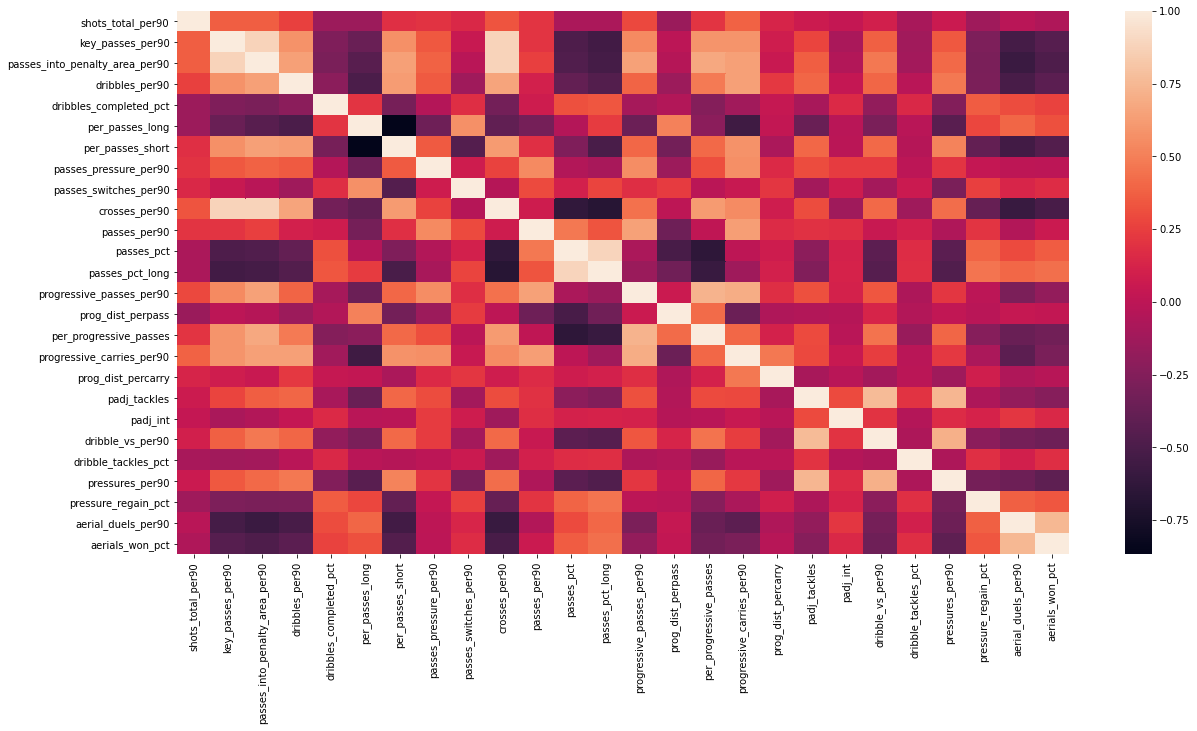

In [465]:
# plotting correlation

import seaborn as sns
plt.figure(figsize=(20,10))
c= normalized_factor_setup.corr()
sns.heatmap(c)

In [466]:
# criteria 1 for FA

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(normalized_factor_setup)
kmo_model

0.8171545227822886

In [467]:
# criteria 2 for FA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(normalized_factor_setup)
chi_square_value, p_value


(11138.041181301069, 0.0)

In [468]:
from factor_analyzer import FactorAnalyzer
from factanal.wrapper import factanal

In [469]:
# finding the number of factors needed for FA by checking eigenvalues
fa = FactorAnalyzer(1, rotation=None)
fa.fit(normalized_factor_setup)

fa.get_eigenvalues()

(array([8.59397704, 3.5926566 , 2.45518902, 2.08593132, 1.19694543,
        1.04305503, 0.99367834, 0.98384034, 0.83664853, 0.65333464,
        0.60314569, 0.55602218, 0.43173558, 0.3589642 , 0.28480246,
        0.24993786, 0.2233744 , 0.19656341, 0.16130142, 0.12628524,
        0.1009196 , 0.09107403, 0.0758992 , 0.04659276, 0.04156586,
        0.01655984]),
 array([ 8.08151623,  2.80943304,  1.73011882,  1.34931059,  0.45176451,
         0.29211569,  0.26676045,  0.18856864, -0.0097792 , -0.11089078,
        -0.17378045, -0.18906334, -0.20533458, -0.2556613 , -0.27640159,
        -0.33437035, -0.34572969, -0.39564102, -0.43800217, -0.49102763,
        -0.5559014 , -0.59169952, -0.60866468, -0.63449499, -0.68673052,
        -0.78489849]))

In [470]:
# finally performing factor analysis

fa_res = factanal(normalized_factor_setup, factors=6, scores='regression', 
                  rotation='promax', verbose=True, return_dict=True)

Uniquenesses: 
             shots_total_per90               key_passes_per90 
                         0.806                          0.138 
passes_into_penalty_area_per90                 dribbles_per90 
                         0.103                          0.344 
        dribbles_completed_pct                per_passes_long 
                         0.841                          0.031 
              per_passes_short          passes_pressure_per90 
                         0.114                          0.597 
         passes_switches_per90                  crosses_per90 
                         0.341                          0.070 
                  passes_per90                     passes_pct 
                         0.120                          0.108 
               passes_pct_long       progressive_passes_per90 
                         0.219                          0.005 
             prog_dist_perpass         per_progressive_passes 
                         0.328          

In [471]:
# creating table for similarity index
defender_stats_final=defender_stats_setup[['player','squad','age']]

In [472]:
# adding factor scores for each player
factor_1=[]
factor_2=[]
factor_3=[]
factor_4=[]
factor_5=[]
factor_6=[]
for x in fa_res['scores']:
    factor_1.append(x[0])
    factor_2.append(x[1])
    factor_3.append(x[2])
    factor_4.append(x[3])
    factor_5.append(x[4])
    factor_6.append(x[5])    
    
defender_stats_final['factor_1']=factor_1
defender_stats_final['factor_2']=factor_2
defender_stats_final['factor_3']=factor_3
defender_stats_final['factor_4']=factor_4
defender_stats_final['factor_5']=factor_5
defender_stats_final['factor_6']=factor_6

In [473]:
# finding closest points by euclidean distance and subsequently finding similarity % 
def distance_from_pique(row):
    z=defender_stats_final[defender_stats_final.player=='Gerard Piqué']
    p_f1=z.factor_1.values[0]
    p_f2=z.factor_2.values[0]
    p_f3=z.factor_3.values[0]
    p_f4=z.factor_4.values[0]
    p_f5=z.factor_5.values[0]
    p_f6=z.factor_6.values[0]
    a=(row['factor_1']-p_f1)**2
    b=(row['factor_2']-p_f2)**2
    c=(row['factor_3']-p_f3)**2
    d=(row['factor_4']-p_f4)**2
    e=(row['factor_5']-p_f5)**2
    f=(row['factor_6']-p_f6)**2
    return (a+b+c+d+e+f)**(1/2)
defender_stats_final['distance_from_pique']=defender_stats_final.apply(distance_from_pique,axis=1)

defender_stats_final['similarity %']=100-100*(defender_stats_final['distance_from_pique']/defender_stats_final['distance_from_pique'].max())

In [475]:
# Most similar players to Pique filtered by minutes played

z=defender_stats_final[defender_stats_final.age<24].sort_values('similarity %', ascending=False)[:15].merge(all_defenders[['player','minutes']], how='left')[['player','squad','age','minutes','similarity %']]
z[z.minutes>1800]

,player,squad,age,minutes,similarity %
1,Gabriel Dos Santos,Arsenal,22,"1,996.00",86.90
2,Jonathan Panzo,Dijon,19,"1,801.00",85.69
3,Igor Zubeldia,Real Sociedad,23,"1,959.00",82.01
4,Jordan Lotomba,Nice,21,"2,123.00",81.73
7,Alessandro Bastoni,Inter,21,"2,922.00",80.74
8,Ben Godfrey,Everton,22,"2,685.00",80.05
9,Rogério,Sassuolo,22,"1,877.00",79.90
10,Robin Le Normand,Real Sociedad,23,"2,747.00",79.57
11,Rúben Dias,Manchester City,23,"2,843.00",79.37
13,Caio Henrique Oliveira Silva,Monaco,23,"2,368.00",79.25


In [407]:
# here onwards code is the same to plot player profiles for closest replacements

france_players=pd.read_csv('FR2021_Outfield.csv')
france_opp=pd.read_csv('FR2021_teams_vs.csv')

france_def=france_players[france_players.position=='DF'].reset_index(drop=True)
france_opp_check=france_opp[['squad','minutes','touches']]

In [408]:
france_def_stats=france_def[['player', 'squad', 'age','minutes','shots_total_per90',
                                   'assisted_shots','passes_into_penalty_area','dribbles','dribbles_completed_pct',
                                   'passes_long','passes_short','passes_pressure','passes_switches','crosses',
                                   'passes','passes_pct','progressive_passes',
                                   'passes_completed','passes_progressive_distance',
                                  'passes_pct_long','progressive_carries','carry_progressive_distance','carries',
                                  'tackles','interceptions','dribbles_vs','dribble_tackles_pct',
                                   'pressures','pressure_regain_pct','aerials_won', 'aerials_lost', 'aerials_won_pct']]

In [409]:
france_opp_check['squad']=france_opp_check.apply(lambda row: row['squad'][3:], axis=1)
france_opp_check.columns=['squad','minutes_total','touches_against']

<ipython-input-409-8644662350f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_opp_check['squad']=france_opp_check.apply(lambda row: row['squad'][3:], axis=1)


In [414]:
france_setup=france_def_stats.merge(france_opp_check)
france_setup=france_setup[france_setup.minutes>=1450].reset_index(drop=True)

In [415]:
# Setting up normalised data points

france_setup['key_passes_per90']=france_setup['assisted_shots']/spain_setup['minutes']*90
france_setup['passes_into_penalty_area_per90']=france_setup['passes_into_penalty_area']/spain_setup['minutes']*90
france_setup['dribbles_per90']=france_setup['dribbles']/france_setup['minutes']*90

france_setup['per_passes_long']=france_setup['passes_long']/france_setup['passes']*100
france_setup['per_passes_short']=france_setup['passes_short']/france_setup['passes']*100
france_setup['passes_pressure_per90']=france_setup['passes_pressure']/france_setup['minutes']*90
france_setup['passes_switches_per90']=france_setup['passes_switches']/france_setup['minutes']*90
france_setup['crosses_per90']=france_setup['crosses']/france_setup['minutes']*90

france_setup['passes_per90']=france_setup['passes']/france_setup['minutes']*90
france_setup['progressive_passes_per90']=france_setup['progressive_passes']/france_setup['minutes']*90
france_setup['prog_dist_perpass']=france_setup['passes_progressive_distance']/france_setup['passes_completed']
france_setup['per_progressive_passes']=france_setup['progressive_passes']/france_setup['passes_completed']*100
france_setup['progressive_carries_per90']=france_setup['progressive_carries']/france_setup['minutes']*90
france_setup['prog_dist_percarry']=france_setup['carry_progressive_distance']/france_setup['carries']

france_setup['padj_tackles']=1000*(france_setup['tackles']/france_setup['minutes'])/(france_setup['touches_against']/france_setup['minutes_total'])
france_setup['padj_int']=1000*(france_setup['interceptions']/france_setup['minutes'])/(france_setup['touches_against']/france_setup['minutes_total'])
france_setup['dribble_vs_per90']=france_setup['dribbles_vs']/france_setup['minutes']*90
france_setup['pressures_per90']=france_setup['pressures']/france_setup['minutes']*90
france_setup['aerial_duels_per90']=(france_setup['aerials_won']+france_setup['aerials_won'])/france_setup['minutes']*90


In [416]:
# final table with required data points

france_final=france_setup[['player', 'squad', 'age','shots_total_per90','key_passes_per90',
       'passes_into_penalty_area_per90', 'dribbles_per90','dribbles_completed_pct',
                        'per_passes_long',
       'per_passes_short', 'passes_pressure_per90', 'passes_switches_per90',
       'crosses_per90','passes_per90','passes_pct',
       'passes_pct_long','progressive_passes_per90',
       'prog_dist_perpass', 'per_progressive_passes',
       'progressive_carries_per90', 'prog_dist_percarry','padj_tackles',
       'padj_int', 'dribble_vs_per90','dribble_tackles_pct','pressures_per90','pressure_regain_pct',
                        'aerial_duels_per90','aerials_won_pct']]

In [417]:
# adding percentile columns for all of the data columns

for x in france_final[['shots_total_per90','key_passes_per90',
       'passes_into_penalty_area_per90', 'dribbles_per90','dribbles_completed_pct',
                        'per_passes_long',
       'per_passes_short', 'passes_pressure_per90', 'passes_switches_per90',
       'crosses_per90','passes_per90','passes_pct',
       'passes_pct_long','progressive_passes_per90',
       'prog_dist_perpass', 'per_progressive_passes',
       'progressive_carries_per90', 'prog_dist_percarry','padj_tackles',
       'padj_int', 'dribble_vs_per90','dribble_tackles_pct','pressures_per90','pressure_regain_pct',
                        'aerial_duels_per90','aerials_won_pct']].columns:
    france_final[x+'_percentile']=france_final[x].rank(pct=True)*100

In [418]:
check=france_final[france_final.player=='Jonathan Panzo']

,player,squad,age,shots_total_per90,key_passes_per90,passes_into_penalty_area_per90,dribbles_per90,dribbles_completed_pct,per_passes_long,per_passes_short,...,progressive_carries_per90_percentile,prog_dist_percarry_percentile,padj_tackles_percentile,padj_int_percentile,dribble_vs_per90_percentile,dribble_tackles_pct_percentile,pressures_per90_percentile,pressure_regain_pct_percentile,aerial_duels_per90_percentile,aerials_won_pct_percentile
64,Jonathan Panzo,Dijon,19,0.30,0.00,0.04,0.75,86.70,23.11,24.93,...,25.00,52.17,27.17,100.00,14.13,90.22,51.09,43.48,70.65,61.41


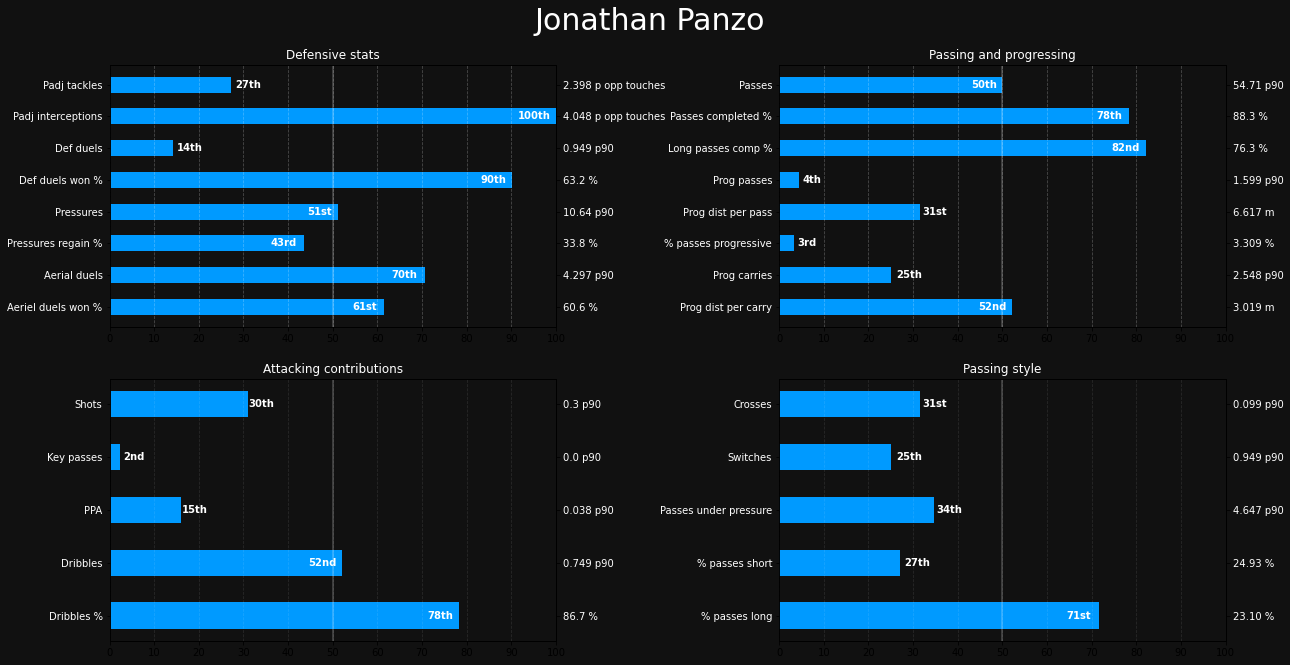

In [419]:
# setting up figure

fig, ((ax4,ax3), (ax1, ax2)) = plt.subplots(2,2,figsize=(20,10))
fig.tight_layout()
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


fig.suptitle('Jonathan Panzo', color='white', size=30)

pos = np.arange(5)
fig.patch.set_facecolor(colors['background'])

ranks = [0, 'Dribbles %', 'Dribbles','PPA', 'Key passes','Shots']
test_units = ['%', 'p90', 'p90', 'p90', 'p90']

rects = ax1.barh(pos, [check[k+'_percentile'].values[0] for k in check[['dribbles_completed_pct','dribbles_per90',
       'passes_into_penalty_area_per90','key_passes_per90','shots_total_per90']].columns],
                 align='center',
                 height=0.5,
                color=colors['bar'])

ax1.set_title('Attacking contributions', color='white')
ax1.set_facecolor(colors['background'])
ax1.set_yticklabels(ranks, color='white')

ax1.set_xlim([0, 100])
ax1.xaxis.set_major_locator(MaxNLocator(11))
ax1.xaxis.grid(True, linestyle='--', which='major',
               color='white', alpha=.1)

ax1.axvline(50, color='white', alpha=0.25)

ax12 = ax1.twinx()

ax12.set_yticks(pos)

ax12.set_ylim(ax1.get_ylim())


ax12.set_yticklabels([str(check[k].values[0])[:5]+' '+ test_units[i] for (k,i) in zip(check[['dribbles_completed_pct','dribbles_per90',
       'passes_into_penalty_area_per90','key_passes_per90','shots_total_per90']].columns,range(len(test_units)))], color='white')



rect_labels = []

for rect in rects:
    width = int(rect.get_width())

    rank_str = attach_ordinal(width)
    if width < 40:
        xloc = 5
        clr = 'white'
        align = 'left'
    else:
        xloc = -5
        clr = 'white'
        align = 'right'

    yloc = rect.get_y() + rect.get_height() / 2
    label = ax1.annotate(
        rank_str, xy=(width, yloc), xytext=(xloc, 0),
        textcoords="offset points",
        horizontalalignment=align, verticalalignment='center',
        color=clr, weight='bold', clip_on=True)
    rect_labels.append(label)
    
    
ranks_1 = [0,'% passes long', '% passes short', 'Passes under pressure', 'Switches',
              'Crosses']
test_units_1 = ['%','%', 'p90', 'p90', 'p90']

rects_1 = ax2.barh(pos, [check[k+'_percentile'].values[0] for k in check[['per_passes_long', 'per_passes_short',
       'passes_pressure_per90', 'passes_switches_per90', 'crosses_per90']].columns],
                 align='center',
                 height=0.5,
                color=colors['bar'])

ax2.set_title('Passing style', color='white')
ax2.set_facecolor(colors['background'])
ax2.set_yticklabels(ranks_1, color='white')

ax2.set_xlim([0, 100])
ax2.xaxis.set_major_locator(MaxNLocator(11))
ax2.xaxis.grid(True, linestyle='--', which='major',
               color='white', alpha=.1)

ax2.axvline(50, color='white', alpha=0.25)

ax22 = ax2.twinx()

ax22.set_yticks(pos)
ax22.set_ylim(ax1.get_ylim())

ax22.set_yticklabels([str(check[k].values[0])[:5]+' '+ test_units_1[i] for (k,i) in zip(check[['per_passes_long', 'per_passes_short',
       'passes_pressure_per90', 'passes_switches_per90', 'crosses_per90']].columns,range(len(test_units_1)))], color='white')



rect_labels_1 = []
for rect in rects_1:
    width_1 = int(rect.get_width())

    rank_str_1 = attach_ordinal(width_1)
    if width_1 < 40:
        xloc_1 = 5
        clr = 'white'
        align = 'left'
    else:
        xloc_1 = -5
        clr = 'white'
        align = 'right'

    yloc_1 = rect.get_y() + rect.get_height() / 2
    label_1 = ax2.annotate(
        rank_str_1, xy=(width_1, yloc_1), xytext=(xloc_1, 0),
        textcoords="offset points",
        horizontalalignment=align, verticalalignment='center',
        color=clr, weight='bold', clip_on=True)
    rect_labels_1.append(label)
    
pos_2 = np.arange(8)
fig.patch.set_facecolor(colors['background'])

ranks_2 = [0, 'Prog dist per carry','Prog carries','% passes progressive',
           'Prog dist per pass','Prog passes','Long passes comp %','Passes completed %','Passes']
test_units_2 = ['m','p90', '%', 'm', 'p90', '%','%','p90']

rects_2 = ax3.barh(pos_2, [check[k+'_percentile'].values[0] for k in check[[
    'prog_dist_percarry','progressive_carries_per90', 'per_progressive_passes','prog_dist_perpass','progressive_passes_per90',
    'passes_pct_long','passes_pct','passes_per90']].columns],
                 align='center',
                 height=0.5,
                color=colors['bar'])

ax3.set_title('Passing and progressing', color='white')
ax3.set_facecolor(colors['background'])
ax3.set_yticklabels(ranks_2, color='white')

ax3.set_xlim([0, 100])
ax3.xaxis.set_major_locator(MaxNLocator(11))
ax3.xaxis.grid(True, linestyle='--', which='major',
               color='white', alpha=.25)

ax3.axvline(50, color='white', alpha=0.25)

ax32 = ax3.twinx()

ax32.set_yticks(pos_2)
ax32.set_ylim(ax3.get_ylim())

ax32.set_yticklabels([str(check[k].values[0])[:5]+' '+ test_units_2[i] for (k,i) in zip(check[['prog_dist_percarry','progressive_carries_per90', 'per_progressive_passes','prog_dist_perpass','progressive_passes_per90',
    'passes_pct_long','passes_pct','passes_per90']].columns,range(len(test_units_2)))], color='white')



rect_labels_2 = []
for rect in rects_2:
    width = int(rect.get_width())

    rank_str = attach_ordinal(width)
    if width < 40:
        xloc = 5
        clr = 'white'
        align = 'left'
    else:
        xloc = -5
        clr = 'white'
        align = 'right'

    yloc = rect.get_y() + rect.get_height() / 2
    label = ax3.annotate(
        rank_str, xy=(width, yloc), xytext=(xloc, 0),
        textcoords="offset points",
        horizontalalignment=align, verticalalignment='center',
        color=clr, weight='bold', clip_on=True)
    rect_labels_2.append(label)
    
    
ranks_3 = [0, 'Aeriel duels won %','Aerial duels','Pressures regain %','Pressures',
              'Def duels won %','Def duels','Padj interceptions','Padj tackles']
test_units_3 = ['%','p90','%','p90','%','p90','p opp touches','p opp touches']

rects_3 = ax4.barh(pos_2, [check[k+'_percentile'].values[0] for k in check[['aerials_won_pct','aerial_duels_per90', 'pressure_regain_pct','pressures_per90',
                                                                            'dribble_tackles_pct','dribble_vs_per90','padj_int','padj_tackles']].columns],
                 align='center',
                 height=0.5,
                color=colors['bar'])

ax4.set_title('Defensive stats', color='white')
ax4.set_facecolor(colors['background'])
ax4.set_yticklabels(ranks_3, color='white')

ax4.set_xlim([0, 100])
ax4.xaxis.set_major_locator(MaxNLocator(11))
ax4.xaxis.grid(True, linestyle='--', which='major',
               color='white', alpha=.25)

ax4.axvline(50, color='white', alpha=0.25)

ax42 = ax4.twinx()

ax42.set_yticks(pos_2)
ax42.set_ylim(ax4.get_ylim())



ax42.set_yticklabels([str(check[k].values[0])[:5]+' '+ test_units_3[i] for (k,i) in zip(check[['aerials_won_pct','aerial_duels_per90', 'pressure_regain_pct','pressures_per90',
                                                                            'dribble_tackles_pct','dribble_vs_per90','padj_int','padj_tackles']].columns,range(len(test_units_3)))], color='white')


rect_labels_3 = []
for rect in rects_3:
    width_1 = int(rect.get_width())

    rank_str_1 = attach_ordinal(width_1)
    if width_1 < 40:
        xloc_1 = 5
        clr = 'white'
        align = 'left'
    else:
        xloc_1 = -5
        clr = 'white'
        align = 'right'

    # Center the text vertically in the bar
    yloc_1 = rect.get_y() + rect.get_height() / 2
    label_1 = ax4.annotate(
        rank_str_1, xy=(width_1, yloc_1), xytext=(xloc_1, 0),
        textcoords="offset points",
        horizontalalignment=align, verticalalignment='center',
        color=clr, weight='bold', clip_on=True)
    rect_labels_3.append(label)

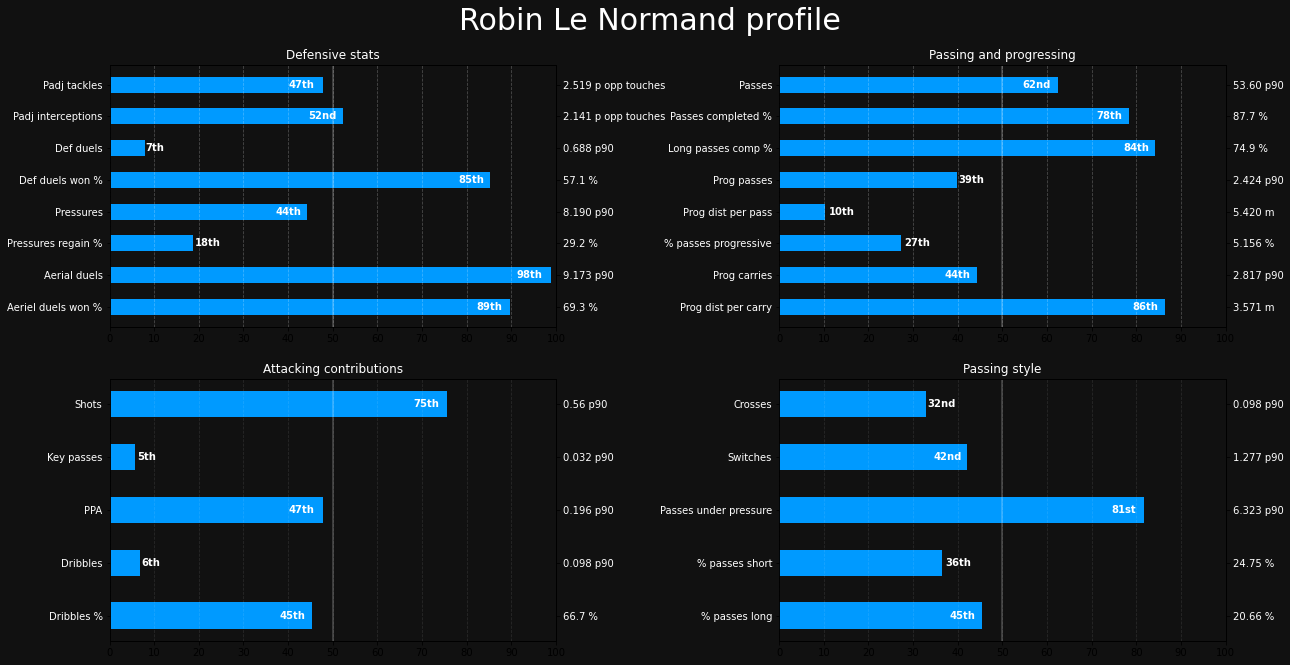

In [429]:
# filtering to pique

check=spain_final[spain_final.player=='Robin Le Normand']

# setting up figure

fig, ((ax4,ax3), (ax1, ax2)) = plt.subplots(2,2,figsize=(20,10))
fig.tight_layout()
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


fig.suptitle('Robin Le Normand profile', color='white', size=30)

pos = np.arange(5)
fig.patch.set_facecolor(colors['background'])

ranks = [0, 'Dribbles %', 'Dribbles','PPA', 'Key passes','Shots']
test_units = ['%', 'p90', 'p90', 'p90', 'p90']

rects = ax1.barh(pos, [check[k+'_percentile'].values[0] for k in check[['dribbles_completed_pct','dribbles_per90',
       'passes_into_penalty_area_per90','key_passes_per90','shots_total_per90']].columns],
                 align='center',
                 height=0.5,
                color=colors['bar'])

ax1.set_title('Attacking contributions', color='white')
ax1.set_facecolor(colors['background'])
ax1.set_yticklabels(ranks, color='white')

ax1.set_xlim([0, 100])
ax1.xaxis.set_major_locator(MaxNLocator(11))
ax1.xaxis.grid(True, linestyle='--', which='major',
               color='white', alpha=.1)

ax1.axvline(50, color='white', alpha=0.25)

ax12 = ax1.twinx()

ax12.set_yticks(pos)

ax12.set_ylim(ax1.get_ylim())


ax12.set_yticklabels([str(check[k].values[0])[:5]+' '+ test_units[i] for (k,i) in zip(check[['dribbles_completed_pct','dribbles_per90',
       'passes_into_penalty_area_per90','key_passes_per90','shots_total_per90']].columns,range(len(test_units)))], color='white')



rect_labels = []

for rect in rects:
    width = int(rect.get_width())

    rank_str = attach_ordinal(width)
    if width < 40:
        xloc = 5
        clr = 'white'
        align = 'left'
    else:
        xloc = -5
        clr = 'white'
        align = 'right'

    yloc = rect.get_y() + rect.get_height() / 2
    label = ax1.annotate(
        rank_str, xy=(width, yloc), xytext=(xloc, 0),
        textcoords="offset points",
        horizontalalignment=align, verticalalignment='center',
        color=clr, weight='bold', clip_on=True)
    rect_labels.append(label)
    
    
ranks_1 = [0,'% passes long', '% passes short', 'Passes under pressure', 'Switches',
              'Crosses']
test_units_1 = ['%','%', 'p90', 'p90', 'p90']

rects_1 = ax2.barh(pos, [check[k+'_percentile'].values[0] for k in check[['per_passes_long', 'per_passes_short',
       'passes_pressure_per90', 'passes_switches_per90', 'crosses_per90']].columns],
                 align='center',
                 height=0.5,
                color=colors['bar'])

ax2.set_title('Passing style', color='white')
ax2.set_facecolor(colors['background'])
ax2.set_yticklabels(ranks_1, color='white')

ax2.set_xlim([0, 100])
ax2.xaxis.set_major_locator(MaxNLocator(11))
ax2.xaxis.grid(True, linestyle='--', which='major',
               color='white', alpha=.1)

ax2.axvline(50, color='white', alpha=0.25)

ax22 = ax2.twinx()

ax22.set_yticks(pos)
ax22.set_ylim(ax1.get_ylim())

ax22.set_yticklabels([str(check[k].values[0])[:5]+' '+ test_units_1[i] for (k,i) in zip(check[['per_passes_long', 'per_passes_short',
       'passes_pressure_per90', 'passes_switches_per90', 'crosses_per90']].columns,range(len(test_units_1)))], color='white')



rect_labels_1 = []
for rect in rects_1:
    width_1 = int(rect.get_width())

    rank_str_1 = attach_ordinal(width_1)
    if width_1 < 40:
        xloc_1 = 5
        clr = 'white'
        align = 'left'
    else:
        xloc_1 = -5
        clr = 'white'
        align = 'right'

    yloc_1 = rect.get_y() + rect.get_height() / 2
    label_1 = ax2.annotate(
        rank_str_1, xy=(width_1, yloc_1), xytext=(xloc_1, 0),
        textcoords="offset points",
        horizontalalignment=align, verticalalignment='center',
        color=clr, weight='bold', clip_on=True)
    rect_labels_1.append(label)
    
pos_2 = np.arange(8)
fig.patch.set_facecolor(colors['background'])

ranks_2 = [0, 'Prog dist per carry','Prog carries','% passes progressive',
           'Prog dist per pass','Prog passes','Long passes comp %','Passes completed %','Passes']
test_units_2 = ['m','p90', '%', 'm', 'p90', '%','%','p90']

rects_2 = ax3.barh(pos_2, [check[k+'_percentile'].values[0] for k in check[[
    'prog_dist_percarry','progressive_carries_per90', 'per_progressive_passes','prog_dist_perpass','progressive_passes_per90',
    'passes_pct_long','passes_pct','passes_per90']].columns],
                 align='center',
                 height=0.5,
                color=colors['bar'])

ax3.set_title('Passing and progressing', color='white')
ax3.set_facecolor(colors['background'])
ax3.set_yticklabels(ranks_2, color='white')

ax3.set_xlim([0, 100])
ax3.xaxis.set_major_locator(MaxNLocator(11))
ax3.xaxis.grid(True, linestyle='--', which='major',
               color='white', alpha=.25)

ax3.axvline(50, color='white', alpha=0.25)

ax32 = ax3.twinx()

ax32.set_yticks(pos_2)
ax32.set_ylim(ax3.get_ylim())

ax32.set_yticklabels([str(check[k].values[0])[:5]+' '+ test_units_2[i] for (k,i) in zip(check[['prog_dist_percarry','progressive_carries_per90', 'per_progressive_passes','prog_dist_perpass','progressive_passes_per90',
    'passes_pct_long','passes_pct','passes_per90']].columns,range(len(test_units_2)))], color='white')



rect_labels_2 = []
for rect in rects_2:
    width = int(rect.get_width())

    rank_str = attach_ordinal(width)
    if width < 40:
        xloc = 5
        clr = 'white'
        align = 'left'
    else:
        xloc = -5
        clr = 'white'
        align = 'right'

    yloc = rect.get_y() + rect.get_height() / 2
    label = ax3.annotate(
        rank_str, xy=(width, yloc), xytext=(xloc, 0),
        textcoords="offset points",
        horizontalalignment=align, verticalalignment='center',
        color=clr, weight='bold', clip_on=True)
    rect_labels_2.append(label)
    
    
ranks_3 = [0, 'Aeriel duels won %','Aerial duels','Pressures regain %','Pressures',
              'Def duels won %','Def duels','Padj interceptions','Padj tackles']
test_units_3 = ['%','p90','%','p90','%','p90','p opp touches','p opp touches']

rects_3 = ax4.barh(pos_2, [check[k+'_percentile'].values[0] for k in check[['aerials_won_pct','aerial_duels_per90', 'pressure_regain_pct','pressures_per90',
                                                                            'dribble_tackles_pct','dribble_vs_per90','padj_int','padj_tackles']].columns],
                 align='center',
                 height=0.5,
                color=colors['bar'])

ax4.set_title('Defensive stats', color='white')
ax4.set_facecolor(colors['background'])
ax4.set_yticklabels(ranks_3, color='white')

ax4.set_xlim([0, 100])
ax4.xaxis.set_major_locator(MaxNLocator(11))
ax4.xaxis.grid(True, linestyle='--', which='major',
               color='white', alpha=.25)

ax4.axvline(50, color='white', alpha=0.25)

ax42 = ax4.twinx()

ax42.set_yticks(pos_2)
ax42.set_ylim(ax4.get_ylim())



ax42.set_yticklabels([str(check[k].values[0])[:5]+' '+ test_units_3[i] for (k,i) in zip(check[['aerials_won_pct','aerial_duels_per90', 'pressure_regain_pct','pressures_per90',
                                                                            'dribble_tackles_pct','dribble_vs_per90','padj_int','padj_tackles']].columns,range(len(test_units_3)))], color='white')


rect_labels_3 = []
for rect in rects_3:
    width_1 = int(rect.get_width())

    rank_str_1 = attach_ordinal(width_1)
    if width_1 < 40:
        xloc_1 = 5
        clr = 'white'
        align = 'left'
    else:
        xloc_1 = -5
        clr = 'white'
        align = 'right'

    # Center the text vertically in the bar
    yloc_1 = rect.get_y() + rect.get_height() / 2
    label_1 = ax4.annotate(
        rank_str_1, xy=(width_1, yloc_1), xytext=(xloc_1, 0),
        textcoords="offset points",
        horizontalalignment=align, verticalalignment='center',
        color=clr, weight='bold', clip_on=True)
    rect_labels_3.append(label)